In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('transactions.xlsx')

print("Initial Data:")
print(df.head())

print("\nData Info:")
print(df.info())

Initial Data:
   TransactionID CustomerID ProductID ProductCategory  Quantity  Price  \
0           1001         C1        P1     Electronics         1    500   
1           1002         C2        P2         Apparel         2     50   
2           1003         C3        P3      Home Goods         3     25   
3           1004         C1        P4     Electronics         1   1200   
4           1005         C4        P5            Food         5      5   

  TransactionDate Region  
0      2024-01-05  North  
1      2024-01-05  South  
2      2024-01-06  North  
3      2024-01-07  North  
4      2024-01-08   West  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    10 non-null     int64 
 1   CustomerID       10 non-null     object
 2   ProductID        10 non-null     object
 3   ProductCategory  10 non-null     obj

In [5]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['TotalSales'] = df['Quantity'] * df['Price']

print("\nDataFrame after cleaning and feature engineering:")
print(df.head())


DataFrame after cleaning and feature engineering:
   TransactionID CustomerID ProductID ProductCategory  Quantity  Price  \
0           1001         C1        P1     Electronics         1    500   
1           1002         C2        P2         Apparel         2     50   
2           1003         C3        P3      Home Goods         3     25   
3           1004         C1        P4     Electronics         1   1200   
4           1005         C4        P5            Food         5      5   

  TransactionDate Region  TotalSales  
0      2024-01-05  North         500  
1      2024-01-05  South         100  
2      2024-01-06  North          75  
3      2024-01-07  North        1200  
4      2024-01-08   West          25  


In [6]:
top_products = df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Most Purchased Products:")
print(top_products)

category_sales = df.groupby('ProductCategory')['TotalSales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:")
print(category_sales)

df['Month'] = df['TransactionDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalSales'].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)

top_customers = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(3)
print("\nTop 3 Customers by Total Spending:")
print(top_customers)


Top 5 Most Purchased Products:
ProductID
P5    5
P3    4
P2    4
P1    2
P4    1
Name: Quantity, dtype: int64

Total Sales by Product Category:
ProductCategory
Electronics    2500
Apparel         275
Home Goods      100
Food             25
Name: TotalSales, dtype: int64

Monthly Sales Trend:
Month
2024-01    2900
Freq: M, Name: TotalSales, dtype: int64

Top 3 Customers by Total Spending:
CustomerID
C1    1700
C2     600
C4     325
Name: TotalSales, dtype: int64


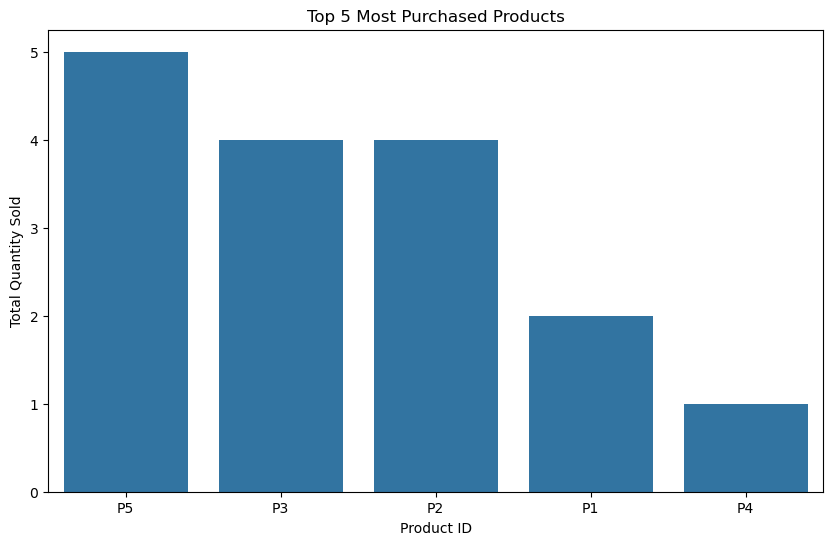

C:\Users\jishn\AppData\Local\Temp\ipykernel_18084\1798832343.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


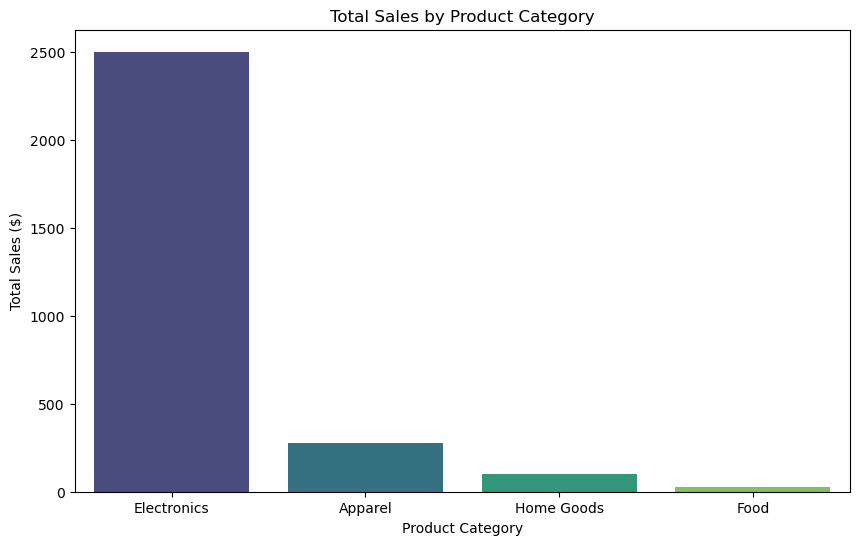

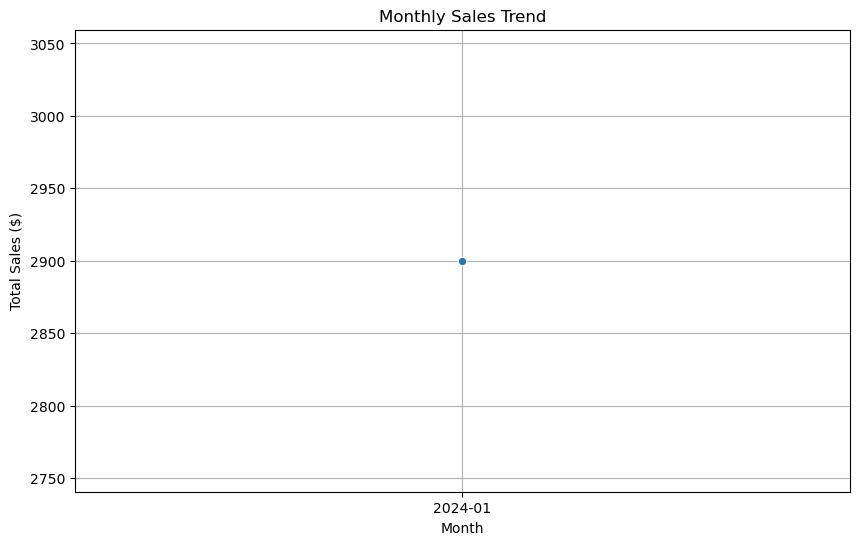

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 5 Most Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.show()


monthly_sales.index = monthly_sales.index.astype(str) # Convert to string for plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()